## DATA IMPORT

In [1]:
from DATA import NARMA10

X_TR, X_VAL, X_TS = NARMA10().split()

In [2]:
X_TR.shape

torch.Size([1, 8000])

In [ ]:
X_VAL.shape

torch.Size([1, 1000])

In [ ]:
X_TS.shape

torch.Size([1, 1000])

In [ ]:
X_TR[:, 0: -1 ].shape

torch.Size([1, 7999])

In [ ]:
X_TR[:, 1: None].shape

torch.Size([1, 7999])

## ESN (No IP)

In [2]:
from ESN import Reservoir, EchoStateNetwork

network = EchoStateNetwork(Reservoir(1, 100))

# Predict next timestep give all previous
network.train(X_TR[:, 0: -1 ], X_TR[:, 1:None], 0.25)

[0.5254605999680383, 0.0024121389477737894, 0.060820601245645076]


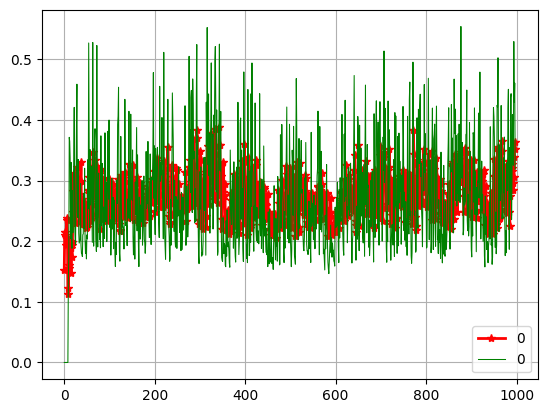

In [3]:
from Metrics import MSE, ME, NRMSE

print([
    network.evaluate(X_TS[:, 0: -2 ], X_TS[:, 1:-1], metric=NRMSE()),
    network.evaluate(X_TS[:, 0: -2 ], X_TS[:, 1:-1], metric=MSE()),
    network.evaluate(X_TS[:, 0: -2 ], X_TS[:, 1:-1], metric=ME(), plot=True)])

In [5]:
X_TS.shape

torch.Size([1, 1000])

In [4]:
network.MC(X_TS)

2.257540335941794

## Classic IP ESN (Normal Distribution)

In [ ]:
from IPReservoir import IPReservoir
from IntrinsicPlasticity import IPMask

ip_reservoir = IPReservoir(1,10)

ip_mask = IPMask.normalMask(10)

ip_reservoir.setIPTargets(ip_mask)

In [ ]:
for _ in range(5): 
    ip_reservoir.predict(X_TR,True,True,True, 0.25)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], requires_grad=True) tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)
tensor([0.9945, 0.9920, 1.0005, 1.0016, 0.9906, 0.9835, 0.9948, 0.9976, 0.9888,
        0.9896], requires_grad=True) tensor([-0.0096,  0.0225, -0.0111,  0.0273,  0.0129,  0.0304, -0.0323,  0.0068,
         0.0255, -0.0228], requires_grad=True)
tensor(0.4483, grad_fn=<DivBackward0>)
tensor([0.9945, 0.9920, 1.0005, 1.0016, 0.9906, 0.9835, 0.9948, 0.9976, 0.9888,
        0.9896], requires_grad=True) tensor([-0.0096,  0.0225, -0.0111,  0.0273,  0.0129,  0.0304, -0.0323,  0.0068,
         0.0255, -0.0228], requires_grad=True)
tensor([0.9910, 0.9864, 1.0012, 1.0023, 0.9813, 0.9688, 0.9907, 0.9954, 0.9798,
        0.9801], requires_grad=True) tensor([-0.0173,  0.0420, -0.0208,  0.0517,  0.0272,  0.0606, -0.0619,  0.0134,
         0.0500, -0.0456], requires_grad=True)
tensor(0.4268, grad_fn=<DivBackward0>)
tensor([0.9910, 0.9864, 1.0012, 1.0023, 0.9813, 0.96

In [ ]:
ip_reservoir.IP_loss

tensor(0.3893, grad_fn=<DivBackward0>)

In [ ]:
ip_reservoir.printIPstats()

Unit - (1): [ ACTUAL_MEAN == (0.08859729021787643)  ACTUAL_STD == (0.10600753128528595)][ TARGET_MEAN == (0.0022318377159535885) TARGET_STD == (1.0117477178573608)]
Unit - (2): [ ACTUAL_MEAN == (-0.04740777984261513)  ACTUAL_STD == (0.07173294574022293)][ TARGET_MEAN == (0.006255787797272205) TARGET_STD == (0.9889535903930664)]
Unit - (3): [ ACTUAL_MEAN == (-0.1562170535326004)  ACTUAL_STD == (0.0367877371609211)][ TARGET_MEAN == (-0.021784482523798943) TARGET_STD == (1.0030089616775513)]
Unit - (4): [ ACTUAL_MEAN == (0.002785949967801571)  ACTUAL_STD == (0.08011684566736221)][ TARGET_MEAN == (-0.026209894567728043) TARGET_STD == (0.9962164163589478)]
Unit - (5): [ ACTUAL_MEAN == (-0.34443727135658264)  ACTUAL_STD == (0.11828077584505081)][ TARGET_MEAN == (-0.0018316839123144746) TARGET_STD == (0.9969444870948792)]
Unit - (6): [ ACTUAL_MEAN == (-0.2020154744386673)  ACTUAL_STD == (0.10585931688547134)][ TARGET_MEAN == (0.02145281806588173) TARGET_STD == (1.001468539237976)]
Unit - (7):

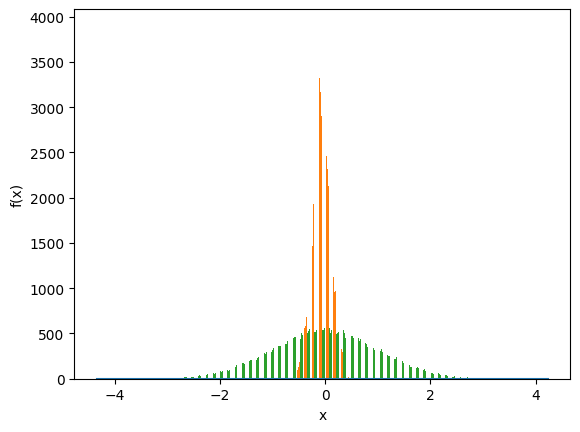

In [ ]:
ip_reservoir.plot_overall_activation_distribution(True)

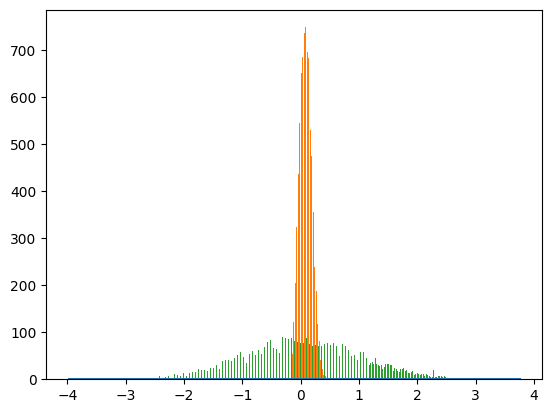

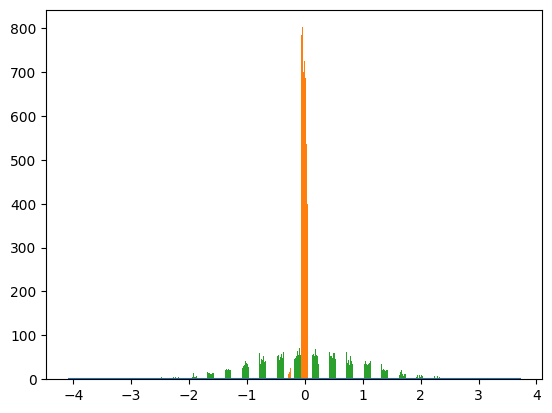

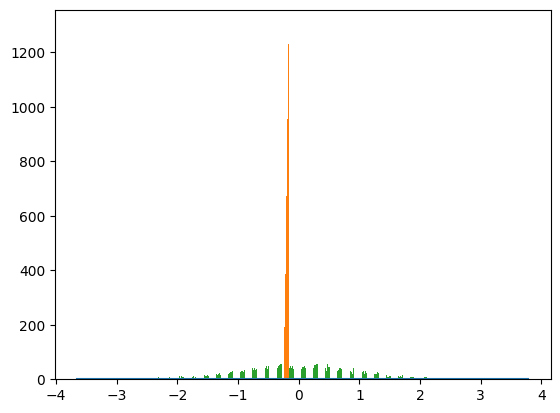

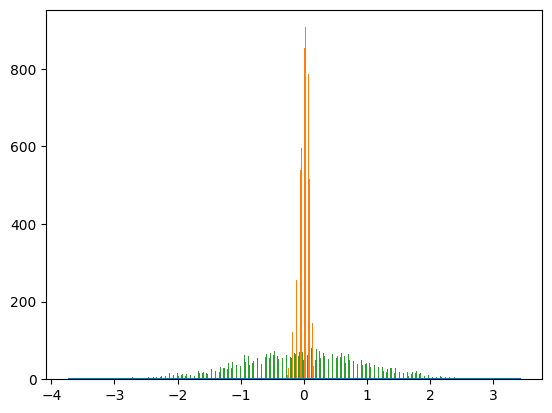

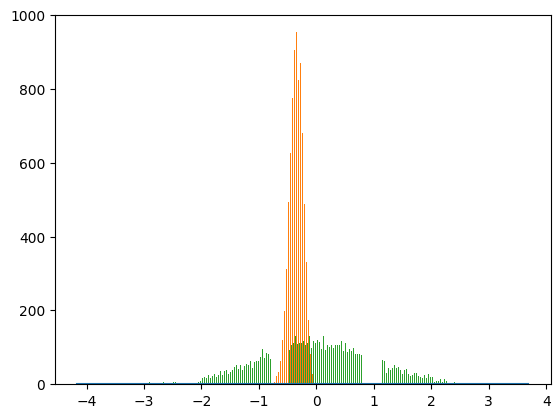

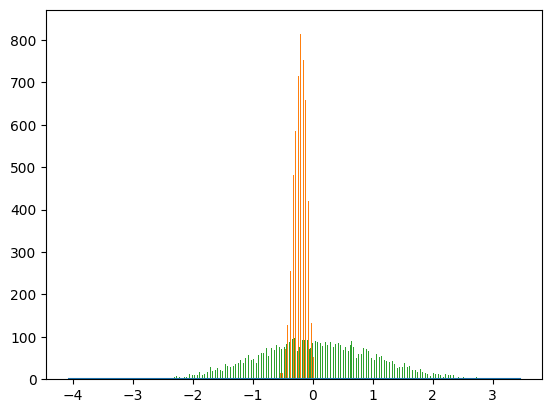

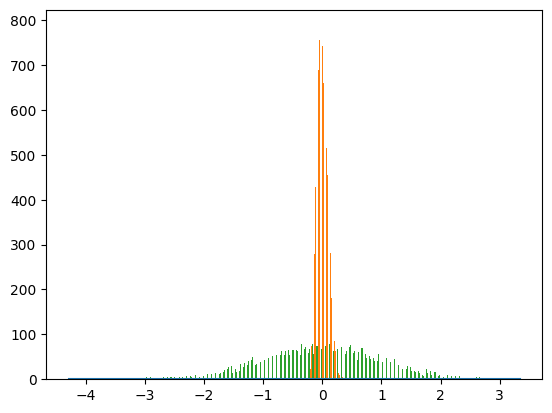

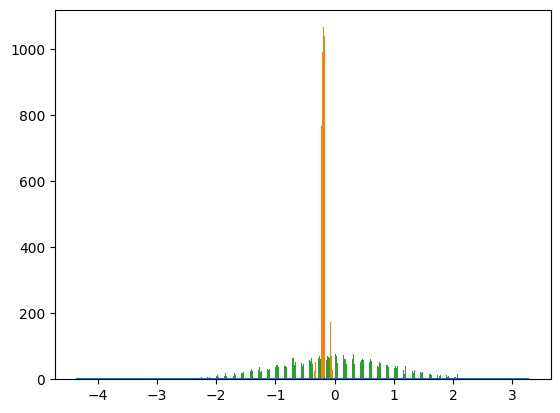

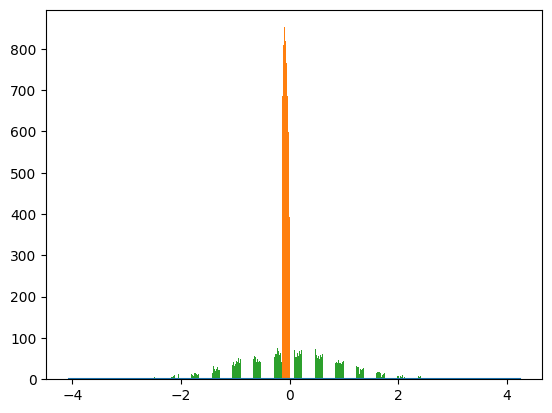

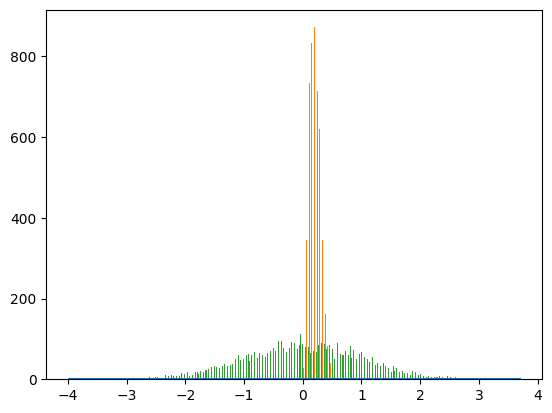

In [ ]:
ip_reservoir.plot_local_neural_activity()

In [ ]:
network = EchoStateNetwork(ip_reservoir)

network.train(X_TR[:, 0: -1 ], X_TR[:, 1:None], 0.05)

### ESN Evaluation

In [ ]:
from Metrics import MSE, ME, NRMSE

print([
    network.evaluate(X_TS[:, 0: -2 ], X_TS[:, 1:-1], metric=NRMSE()),
    network.evaluate(X_TS[:, 0: -2 ], X_TS[:, 1:-1], metric=MSE()),
    network.evaluate(X_TS[:, 0: -2 ], X_TS[:, 1:-1], metric=ME())])

[0.5355969796893634, 0.002507265490530759, 0.06287516332605318]


0.5372442700162767

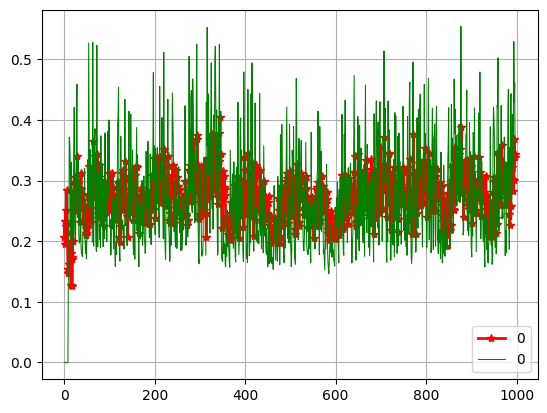

In [ ]:
network.evaluate(X_VAL[:, 0: -2 ], X_VAL[:, 1:-1], metric=NRMSE(), plot=True)

## Critical IP ESN (Alternate Positive and Negative Gaussian Distribution)


In [ ]:

from IPReservoir import IPReservoir
from IntrinsicPlasticity import IPMask

ip_reservoir = IPReservoir(1,100)

ip_mask = IPMask.mixedBimodalMask(100)

ip_reservoir.setIPTargets(ip_mask)

In [ ]:
for _ in range(15): 
    ip_reservoir.predict(X_TR,True,True,True, 0.25)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], requires_grad=True) tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.], requires_grad=True)
tensor([0.9992, 1.0000, 0.9990, 0.9998, 0.9981, 0.9995, 0.9999, 0.9998

In [ ]:
ip_reservoir.IP_loss

tensor(0.1501, grad_fn=<DivBackward0>)

In [ ]:
ip_reservoir.printIPstats()

Unit - (1): [ ACTUAL_MEAN == (-0.016874011605978012)  ACTUAL_STD == (0.10104435682296753)][ TARGET_MEAN == (-0.9164612889289856) TARGET_STD == (0.5833849310874939)]
Unit - (2): [ ACTUAL_MEAN == (-0.20750197768211365)  ACTUAL_STD == (0.09501203149557114)][ TARGET_MEAN == (0.9175639152526855) TARGET_STD == (0.582061767578125)]
Unit - (3): [ ACTUAL_MEAN == (0.05328654870390892)  ACTUAL_STD == (0.09893828630447388)][ TARGET_MEAN == (-0.926957905292511) TARGET_STD == (0.5842386484146118)]
Unit - (4): [ ACTUAL_MEAN == (-0.19098138809204102)  ACTUAL_STD == (0.08828399330377579)][ TARGET_MEAN == (0.916889488697052) TARGET_STD == (0.5803790092468262)]
Unit - (5): [ ACTUAL_MEAN == (0.09528929740190506)  ACTUAL_STD == (0.12398000806570053)][ TARGET_MEAN == (-0.9214233756065369) TARGET_STD == (0.5776010155677795)]
Unit - (6): [ ACTUAL_MEAN == (-0.08877186477184296)  ACTUAL_STD == (0.11733826994895935)][ TARGET_MEAN == (0.9216182231903076) TARGET_STD == (0.5820620656013489)]
Unit - (7): [ ACTUAL_ME

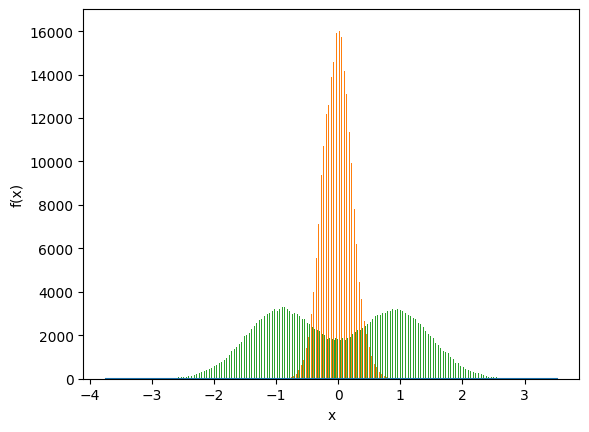

In [ ]:

ip_reservoir.plot_overall_activation_distribution()

In [ ]:
ip_reservoir.plot_local_neural_activity()

In [ ]:
network = EchoStateNetwork(ip_reservoir)

network.train(X_TR[:, 0: -1 ], X_TR[:, 1:None], 0.25)


[0.508279093821798, 0.00227789310896979, 0.055691476336027224]


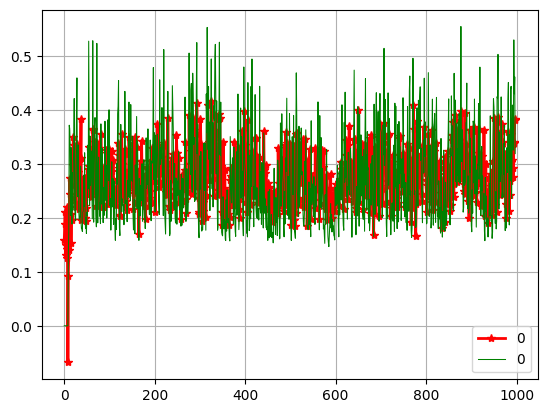

In [ ]:
print([
    network.evaluate(X_TS[:, 0: -2 ], X_TS[:, 1:-1], metric=NRMSE()),
    network.evaluate(X_TS[:, 0: -2 ], X_TS[:, 1:-1], metric=MSE()),
    network.evaluate(X_TS[:, 0: -2 ], X_TS[:, 1:-1], metric=ME(), plot=True)])

## Critical IP ESN (Mixture of Gaussian)


In [ ]:

from IPReservoir import IPReservoir
from IntrinsicPlasticity import IPMask

ip_reservoir = IPReservoir(1,10)

ip_mask = IPMask.fullBimodalMask(10)

ip_reservoir.setIPTargets(ip_mask)

In [ ]:
for _ in range(5): 
    ip_reservoir.predict(X_TR, True,True,True, 0.25)

tensor([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], requires_grad=True) tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)
tensor([1.0136, 0.9992, 1.0025, 0.9544, 1.0030, 0.9978, 1.0194, 0.9852, 0.9532,
        0.9820], requires_grad=True) tensor([ 0.0189, -0.0102,  0.0419, -0.2000, -0.0588,  0.0772, -0.0850, -0.0841,
         0.0963, -0.1173], requires_grad=True)
tensor(0.2324, grad_fn=<DivBackward0>)
tensor([1.0136, 0.9992, 1.0025, 0.9544, 1.0030, 0.9978, 1.0194, 0.9852, 0.9532,
        0.9820], requires_grad=True) tensor([ 0.0189, -0.0102,  0.0419, -0.2000, -0.0588,  0.0772, -0.0850, -0.0841,
         0.0963, -0.1173], requires_grad=True)
tensor([1.0122, 0.9991, 1.0024, 0.9385, 0.9977, 0.9881, 1.0143, 0.9776, 0.9454,
        0.9791], requires_grad=True) tensor([ 0.0099, -0.0113,  0.0413, -0.1835, -0.0407,  0.0624, -0.0705, -0.0674,
         0.0764, -0.1042], requires_grad=True)
tensor(0.2799, grad_fn=<DivBackward0>)
tensor([1.0122, 0.9991, 1.0024, 0.9385, 0.9977, 0.98

In [ ]:
ip_reservoir.IP_loss

tensor(0.2437, grad_fn=<DivBackward0>)

In [ ]:
ip_reservoir.printIPstats()

Unit - (1): [ ACTUAL_MEAN == (0.11094442009925842)  ACTUAL_STD == (0.14269889891147614)][ TARGET_MEAN == (0.0009485630434937775) TARGET_STD == (1.0869948863983154)]
Unit - (2): [ ACTUAL_MEAN == (-0.05429394543170929)  ACTUAL_STD == (0.06086858734488487)][ TARGET_MEAN == (0.01796223782002926) TARGET_STD == (1.0941040515899658)]
Unit - (3): [ ACTUAL_MEAN == (0.039358820766210556)  ACTUAL_STD == (0.07507660984992981)][ TARGET_MEAN == (-0.001186223467811942) TARGET_STD == (1.08653724193573)]
Unit - (4): [ ACTUAL_MEAN == (-0.7691124081611633)  ACTUAL_STD == (0.05402089282870293)][ TARGET_MEAN == (0.007688721176236868) TARGET_STD == (1.088737964630127)]
Unit - (5): [ ACTUAL_MEAN == (-0.2717357575893402)  ACTUAL_STD == (0.0620611272752285)][ TARGET_MEAN == (-0.00587629247456789) TARGET_STD == (1.0958324670791626)]
Unit - (6): [ ACTUAL_MEAN == (0.5197073221206665)  ACTUAL_STD == (0.05033191293478012)][ TARGET_MEAN == (0.007784320041537285) TARGET_STD == (1.0804224014282227)]
Unit - (7): [ ACTU

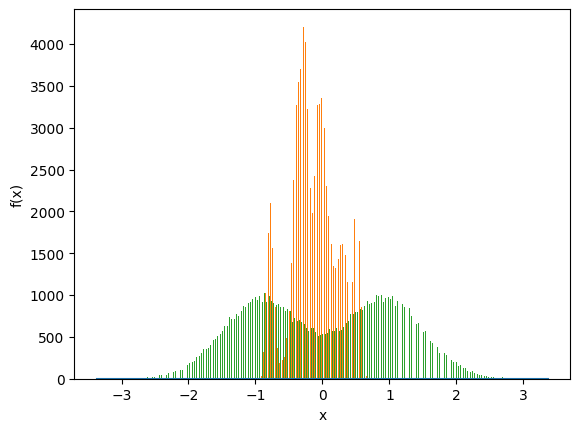

In [ ]:

ip_reservoir.plot_overall_activation_distribution()

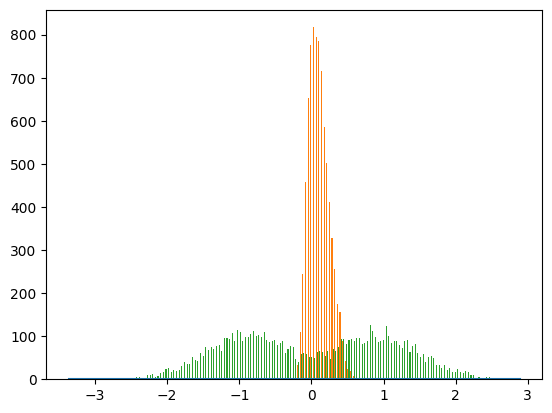

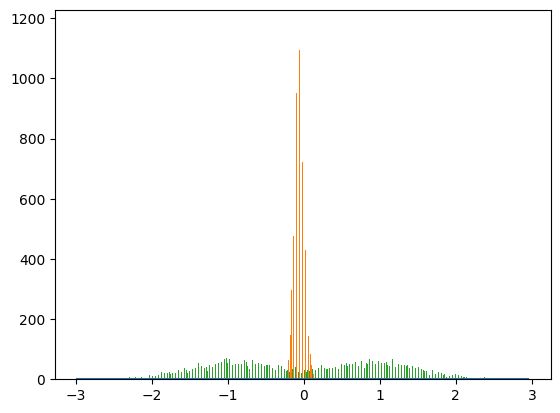

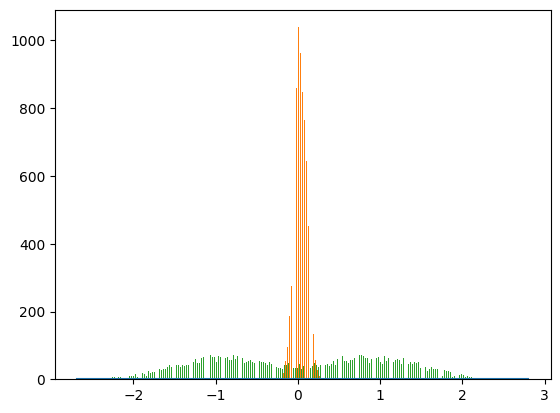

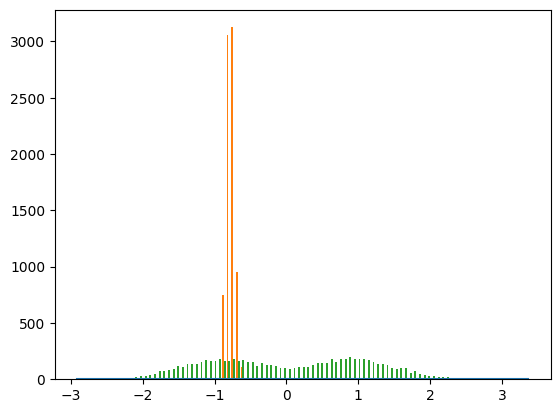

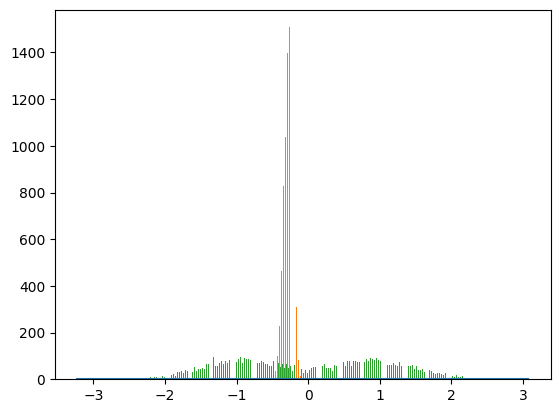

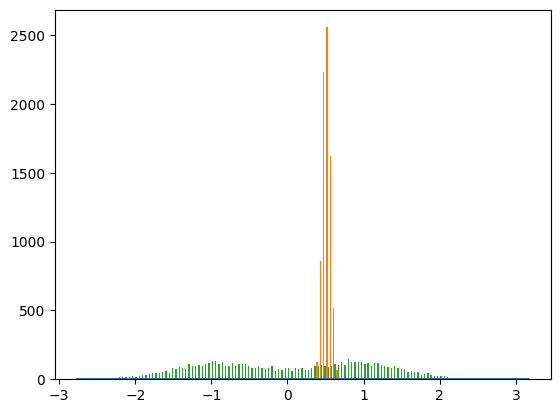

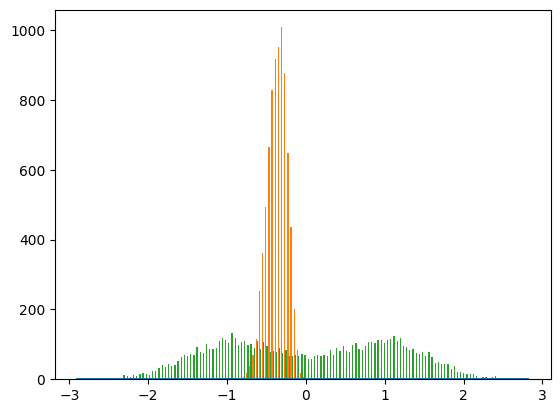

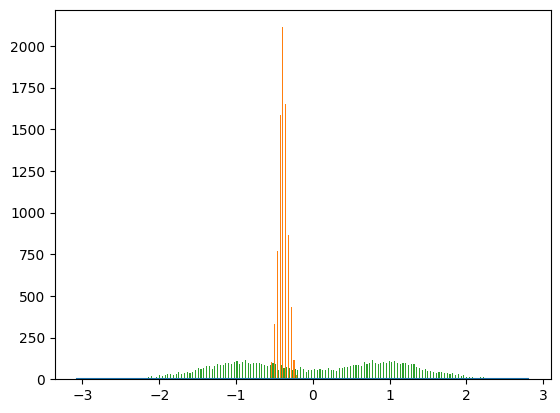

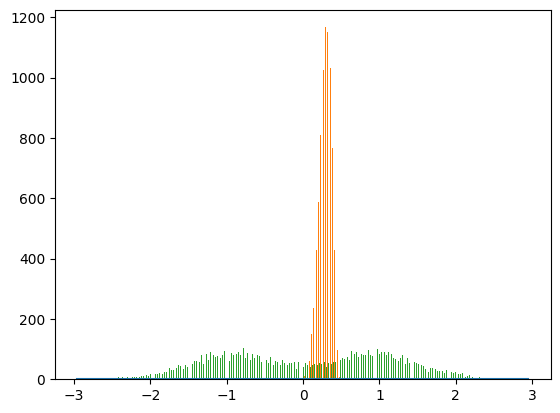

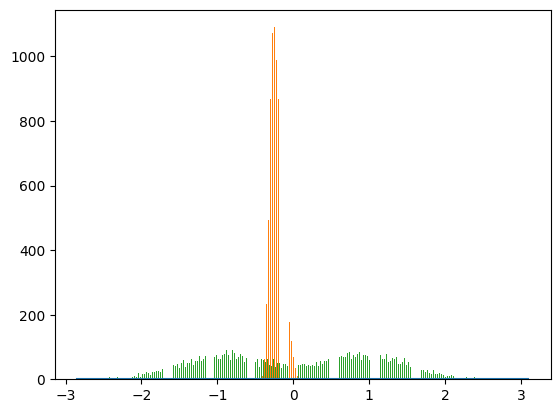

In [ ]:
ip_reservoir.plot_local_neural_activity()

In [ ]:
network = EchoStateNetwork(ip_reservoir)

network.train(X_TR[:, 0: -1 ], X_TR[:, 1:None], 0.05)

[0.5359383310907815, 0.002508262326517508, 0.06466577573673517]


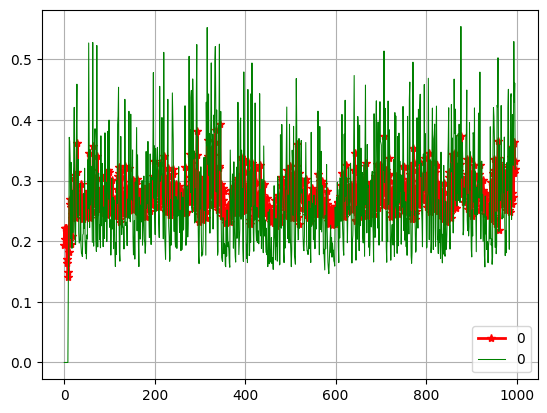

In [ ]:
print([
    network.evaluate(X_TS[:, 0: -2 ], X_TS[:, 1:-1], metric=NRMSE()),
    network.evaluate(X_TS[:, 0: -2 ], X_TS[:, 1:-1], metric=MSE()),
    network.evaluate(X_TS[:, 0: -2 ], X_TS[:, 1:-1], metric=ME(), plot=True)])

## [BIASED] Critical IP ESN (Mixture of Gaussian)

In [ ]:

from IPReservoir import IPReservoir
from IntrinsicPlasticity import IPMask

ip_reservoir = IPReservoir(1, 100, 1, bias=True)

ip_mask = IPMask.fullBimodalMask(100)

ip_reservoir.setIPTargets(ip_mask)

In [ ]:
for _ in range(5): 
    ip_reservoir.predict(X_TR, True,True,True, 0.25)

tensor([0.9986, 0.9994, 0.9906, 0.9927, 0.9926, 0.9951, 0.9975, 0.9940, 0.9965,
        0.9925, 0.9957, 0.9999, 0.9990, 0.9973, 1.0008, 0.9953, 1.0000, 1.0002,
        0.9966, 0.9957, 0.9997, 0.9961, 0.9947, 0.9954, 1.0000, 0.9928, 0.9980,
        0.9968, 0.9957, 0.9971, 0.9915, 0.9960, 0.9933, 0.9977, 0.9998, 0.9961,
        0.9939, 0.9921, 0.9988, 1.0008, 0.9982, 0.9951, 0.9971, 0.9961, 0.9943,
        0.9997, 0.9978, 1.0003, 0.9978, 0.9999, 0.9983, 0.9985, 0.9973, 1.0000,
        0.9998, 0.9947, 0.9964, 0.9991, 1.0000, 0.9983, 0.9952, 0.9994, 1.0016,
        0.9983, 0.9966, 0.9996, 0.9933, 0.9936, 0.9984, 0.9995, 1.0000, 0.9913,
        0.9988, 0.9991, 0.9933, 0.9994, 0.9970, 0.9908, 0.9978, 0.9947, 0.9983,
        0.9996, 0.9968, 0.9954, 0.9982, 0.9990, 0.9953, 1.0002, 0.9928, 1.0011,
        0.9953, 0.9980, 0.9941, 1.0010, 0.9978, 0.9994, 0.9999, 0.9916, 0.9987,
        0.9980], requires_grad=True) tensor([ 1.1689e-02,  1.4041e-03,  1.4348e-02,  7.9689e-03,  1.0853e-02,
         4

In [ ]:
ip_reservoir.IP_loss

tensor(0.3701, grad_fn=<DivBackward0>)

In [ ]:
ip_reservoir.printIPstats()

Unit - (1): [ ACTUAL_MEAN == (-0.09047477692365646)  ACTUAL_STD == (0.10517803579568863)][ TARGET_MEAN == (0.021395277231931686) TARGET_STD == (1.0934165716171265)]
Unit - (2): [ ACTUAL_MEAN == (-0.41775771975517273)  ACTUAL_STD == (0.08296329528093338)][ TARGET_MEAN == (-0.002858200576156378) TARGET_STD == (1.089842438697815)]
Unit - (3): [ ACTUAL_MEAN == (-0.6068434715270996)  ACTUAL_STD == (0.08519388735294342)][ TARGET_MEAN == (0.007445854134857655) TARGET_STD == (1.0880601406097412)]
Unit - (4): [ ACTUAL_MEAN == (-0.886292040348053)  ACTUAL_STD == (0.06959538906812668)][ TARGET_MEAN == (0.002524326788261533) TARGET_STD == (1.0887459516525269)]
Unit - (5): [ ACTUAL_MEAN == (-0.6548399329185486)  ACTUAL_STD == (0.03907247260212898)][ TARGET_MEAN == (-0.01381185557693243) TARGET_STD == (1.0868208408355713)]
Unit - (6): [ ACTUAL_MEAN == (-1.0989874601364136)  ACTUAL_STD == (0.07953964173793793)][ TARGET_MEAN == (0.009370238520205021) TARGET_STD == (1.0865604877471924)]
Unit - (7): [ A

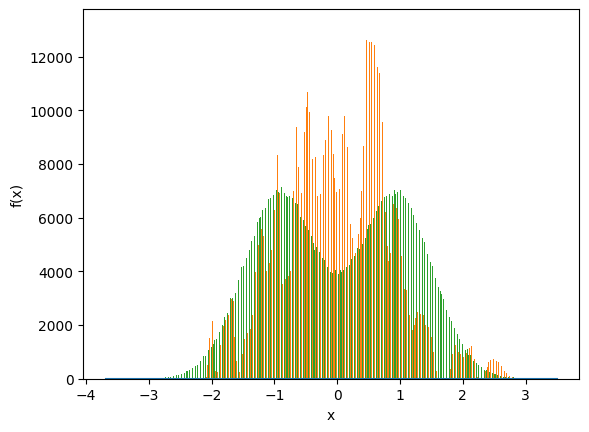

In [ ]:

ip_reservoir.plot_overall_activation_distribution()

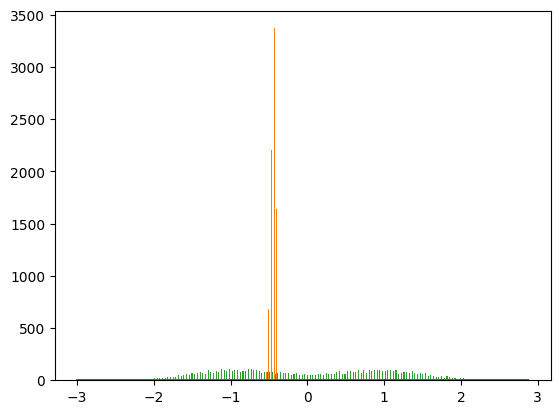

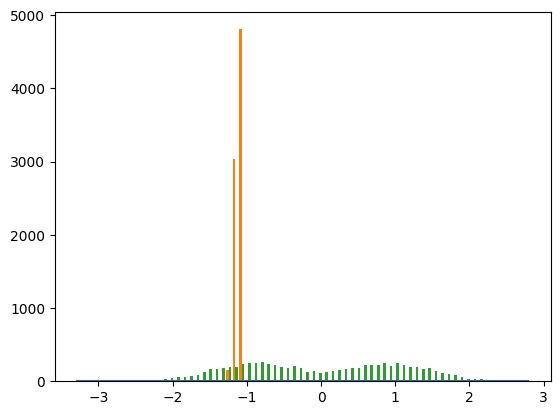

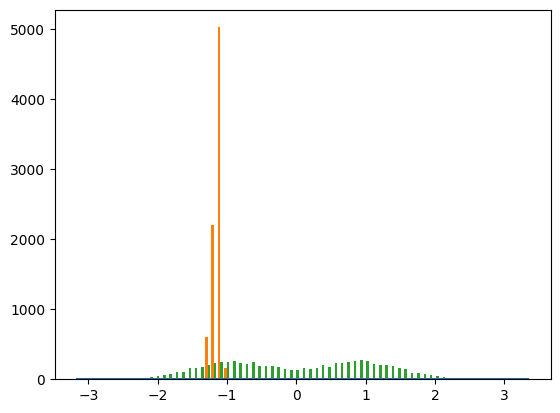

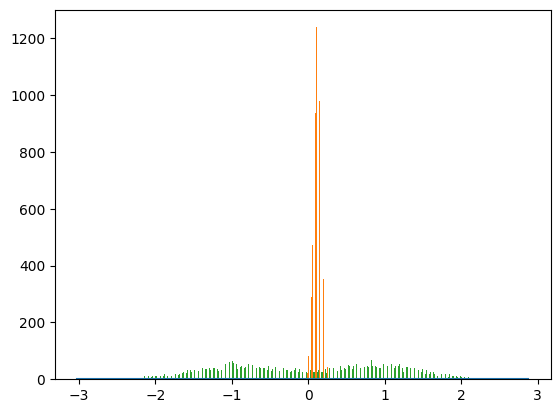

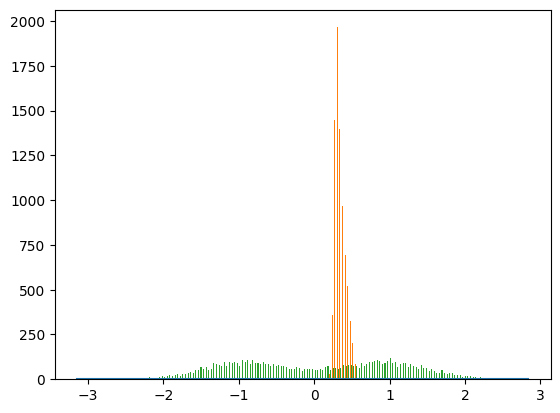

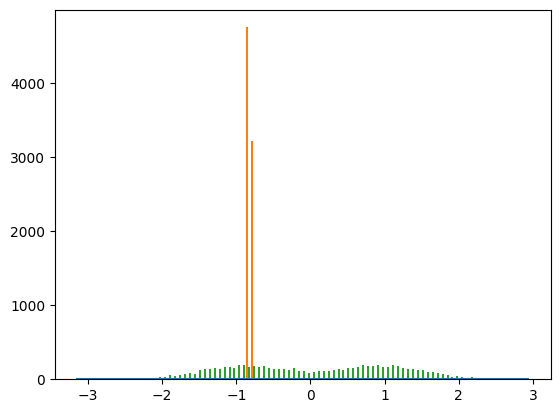

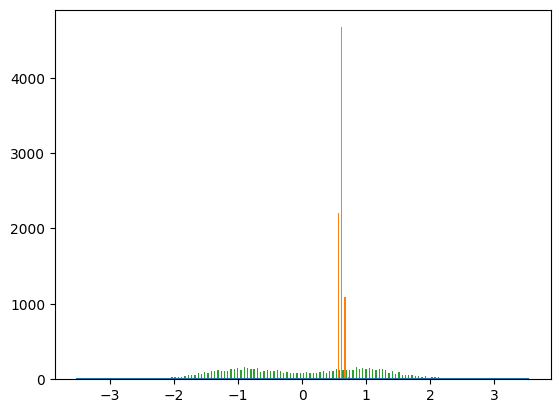

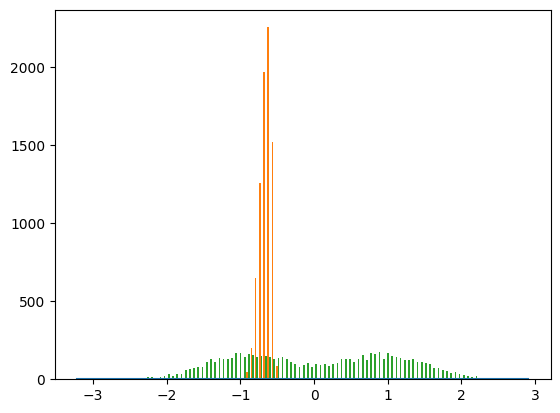

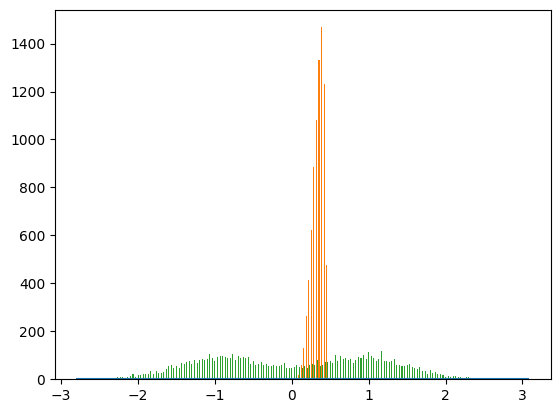

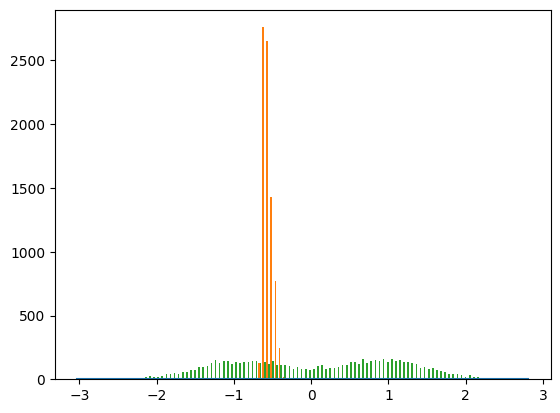

In [ ]:
ip_reservoir.plot_local_neural_activity()

In [ ]:
from ESN import EchoStateNetwork

network = EchoStateNetwork(ip_reservoir)

network.train(X_TR[:, 0: -1 ], X_TR[:, 1:None], 0.2)

[0.5193401465026531, 0.0023787471831063865, 0.06064734866143228]


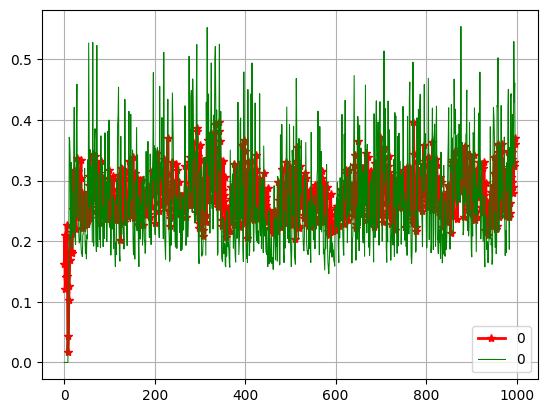

In [ ]:
from Metrics import *

print([
    network.evaluate(X_TS[:, 0: -2 ], X_TS[:, 1:-1], metric=NRMSE()),
    network.evaluate(X_TS[:, 0: -2 ], X_TS[:, 1:-1], metric=MSE()),
    network.evaluate(X_TS[:, 0: -2 ], X_TS[:, 1:-1], metric=ME(), plot=True)])